# Exploratory Data Analysis - Financial Features

This notebook performs exploratory data analysis on the financial features data. This data contains financial information about customers that might be predictive of loan default behavior.

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from datetime import datetime

# Set plot style
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 8)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Loading the Data

In [22]:
# Load financial data
financials_data_path = '../data/features_financials.csv'
financials_df = pd.read_csv(financials_data_path)

# Display basic information
print(f"Financial data shape: {financials_df.shape}")
financials_df.head()

Financial data shape: (12500, 22)


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x1000,30625.94,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",57,26,1.63,11.0,Bad,1562.91,30.077191,10 Years and 9 Months,Yes,42.941090,77.31427572208112,High_spent_Medium_value_payments,400.36080052211616,2023-05-01
1,CUS_0x1009,52312.68_,4250.390000,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",5,18,9.73,4.0,_,202.68,40.286997,31 Years and 0 Months,Yes,108.366467,58.66019164829086,High_spent_Medium_value_payments,508.01234122645366,2025-01-01
2,CUS_0x100b,113781.38999999998,9549.782500,1,4,1,0,NaN,14,8,8.34,4.0,Good,1030.2,28.592943,15 Years and 10 Months,No,0.000000,617.0792665202719,High_spent_Small_value_payments,597.8989834797281,2024-03-01
3,CUS_0x1011,58918.47,5208.872500,3,3,17,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27,13,14.42,7.0,Standard,473.14,27.829959,15 Years and 10 Months,Yes,123.434939,383.35084463651407,Low_spent_Medium_value_payments,294.1014665671429,2023-11-01
4,CUS_0x1013,98620.98,7962.415000,3,3,6,3,"Student Loan, Debt Consolidation Loan, and Per...",12,9,1.33,3.0,Good,1233.51,26.524864,17 Years and 10 Months,No,228.018084,332.3337079767732,High_spent_Medium_value_payments,485.8897083704929,2023-12-01


## 2. Data Overview and Basic Statistics

In [23]:
# Check data types
financials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               12500 non-null  object 
 1   Annual_Income             12500 non-null  object 
 2   Monthly_Inhand_Salary     12500 non-null  float64
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    12500 non-null  object 
 10  Changed_Credit_Limit      12500 non-null  object 
 11  Num_Credit_Inquiries      12500 non-null  float64
 12  Credit_Mix                12500 non-null  object 
 13  Outstanding_Debt          12500 non-null  object 
 14  Credit

In [24]:
# Check basic statistics
financials_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,12500,12500,CUS_0x1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,12500,12492,95596.35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,12500.0,NaN,NaN,NaN,4188.592303,3180.147611,303.645417,1624.937917,3087.595,5947.364167,15204.633333
Num_Bank_Accounts,12500.0,NaN,NaN,NaN,16.93992,114.350815,-1.0,3.0,6.0,7.0,1756.0
Num_Credit_Card,12500.0,NaN,NaN,NaN,23.17272,132.005866,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,12500.0,NaN,NaN,NaN,73.21336,468.682227,1.0,8.0,14.0,20.0,5789.0
Num_of_Loan,12500,87,3,1808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type_of_Loan,11074,6260,Not Specified,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,12500.0,NaN,NaN,NaN,21.06088,14.863091,-5.0,10.0,18.0,28.0,67.0
Num_of_Delayed_Payment,12500,168,19,735,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Quality Check

In [25]:
# Check for missing values
missing_values = financials_df.isnull().sum()
missing_percentage = (missing_values / len(financials_df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Display only columns with missing values
missing_df = missing_df.loc[missing_df['Missing Values'] > 0]
if not missing_df.empty:
    print("Columns with missing values:")
    display(missing_df)
else:
    print("No missing values found in the dataset!")

Columns with missing values:


,Missing Values,Missing Percentage
Type_of_Loan,1426,11.408


In [26]:
# Check for duplicates
duplicate_rows = financials_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


## 4. Examination of Problematic Fields

In [27]:
# Function to check for underscores in numeric fields
def check_for_underscores(df, column):
    # Convert to string to check for underscores
    has_underscore = df[column].astype(str).str.contains('_')
    underscore_count = has_underscore.sum()
    total_count = len(df[column])
    print(f"Column: {column}")
    print(f"Values with underscores: {underscore_count} ({(underscore_count/total_count)*100:.2f}%)")
    
    if underscore_count > 0:
        print("Sample values with underscores:")
        print(df.loc[has_underscore, column].head(5))
    print("\n")
    
    return has_underscore

# Check numeric columns that might have underscores
numeric_columns = [
    'Annual_Income', 
    'Num_of_Loan', 
    'Num_of_Delayed_Payment', 
    'Outstanding_Debt'
]

for column in numeric_columns:
    check_for_underscores(financials_df, column)

Column: Annual_Income
Values with underscores: 859 (6.87%)
Sample values with underscores:
1     52312.68_
29    49718.55_
34    20652.98_
51    28315.95_
56    43062.54_
Name: Annual_Income, dtype: object


Column: Num_of_Loan
Values with underscores: 623 (4.98%)
Sample values with underscores:
13    1_
29    6_
44    2_
51    2_
65    4_
Name: Num_of_Loan, dtype: object


Column: Num_of_Delayed_Payment
Values with underscores: 374 (2.99%)
Sample values with underscores:
48     18_
85     20_
121     0_
312     9_
339    19_
Name: Num_of_Delayed_Payment, dtype: object


Column: Outstanding_Debt
Values with underscores: 139 (1.11%)
Sample values with underscores:
50     2699.17_
78      642.42_
98      755.17_
281      865.3_
430     149.92_
Name: Outstanding_Debt, dtype: object




In [28]:
# Check for placeholder values in categorical fields
def check_for_placeholders(df, column):
    # Check for blank, underscore, or other placeholder values
    value_counts = df[column].value_counts(dropna=False)
    print(f"Column: {column}")
    print(f"Total unique values: {len(value_counts)}")
    
    # Check for blank values
    if '' in value_counts:
        print(f"Blank values: {value_counts['']} ({(value_counts[''] / len(df)) * 100:.2f}%)")
    
    # Check for underscore placeholders
    underscore_pattern = r'^_+$'
    underscore_matches = df[column].astype(str).str.match(underscore_pattern)
    underscore_count = underscore_matches.sum()
    if underscore_count > 0:
        print(f"Underscore placeholders: {underscore_count} ({(underscore_count / len(df)) * 100:.2f}%)")
    
    # Show top values
    print("\nTop 10 values:")
    print(value_counts.head(10))
    print("\n")
    
    return value_counts

# Check categorical columns
categorical_columns = [
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour'
]

for column in categorical_columns:
    check_for_placeholders(financials_df, column)

Column: Type_of_Loan
Total unique values: 6261

Top 10 values:
Type_of_Loan
NaN                        1426
Not Specified               176
Credit-Builder Loan         160
Personal Loan               159
Debt Consolidation Loan     158
Student Loan                155
Payday Loan                 150
Mortgage Loan               147
Auto Loan                   144
Home Equity Loan            142
Name: count, dtype: int64


Column: Credit_Mix
Total unique values: 4
Underscore placeholders: 2611 (20.89%)

Top 10 values:
Credit_Mix
Standard    4497
Good        3032
_           2611
Bad         2360
Name: count, dtype: int64


Column: Payment_of_Min_Amount
Total unique values: 3

Top 10 values:
Payment_of_Min_Amount
Yes    6571
No     4491
NM     1438
Name: count, dtype: int64


Column: Payment_Behaviour
Total unique values: 7

Top 10 values:
Payment_Behaviour
Low_spent_Small_value_payments      3202
High_spent_Medium_value_payments    2242
Low_spent_Medium_value_payments     1686
High_spent_

In [29]:
# Analyze complex text fields
def analyze_credit_history_age(df):
    # Extract sample values
    sample_values = df['Credit_History_Age'].head(20)
    print("Sample Credit_History_Age values:")
    print(sample_values)
    
    # Extract years and months using regex
    def extract_years_months(value):
        if pd.isna(value):
            return None, None
        
        years_pattern = r'(\d+)\s*Years?'
        months_pattern = r'(\d+)\s*Months?'
        
        years_match = re.search(years_pattern, str(value))
        months_match = re.search(months_pattern, str(value))
        
        years = int(years_match.group(1)) if years_match else 0
        months = int(months_match.group(1)) if months_match else 0
        
        return years, months
    
    # Apply extraction to all values
    years_months = df['Credit_History_Age'].apply(extract_years_months)
    years = years_months.apply(lambda x: x[0] if x is not None else None)
    months = years_months.apply(lambda x: x[1] if x is not None else None)
    
    # Create total months column
    total_months = years * 12 + months
    
    # Display statistics
    print("\nCredit History Age Statistics (in total months):")
    print(total_months.describe())
    
    return years, months, total_months

credit_history_years, credit_history_months, credit_history_total_months = analyze_credit_history_age(financials_df)

Sample Credit_History_Age values:
0      10 Years and 9 Months
1      31 Years and 0 Months
2     15 Years and 10 Months
3     15 Years and 10 Months
4     17 Years and 10 Months
5      21 Years and 5 Months
6      14 Years and 3 Months
7      20 Years and 8 Months
8      30 Years and 3 Months
9     22 Years and 10 Months
10     16 Years and 3 Months
11     19 Years and 9 Months
12     20 Years and 0 Months
13    26 Years and 11 Months
14     10 Years and 5 Months
15    31 Years and 11 Months
16     10 Years and 0 Months
17     32 Years and 3 Months
18     25 Years and 2 Months
19    14 Years and 10 Months
Name: Credit_History_Age, dtype: object

Credit History Age Statistics (in total months):
count    12500.000000
mean       224.608720
std         99.655759
min          8.000000
25%        148.000000
50%        222.000000
75%        305.000000
max        404.000000
Name: Credit_History_Age, dtype: float64


## 5. Financial Analysis

In [48]:
# Count unique customers
unique_customers = financials_df['Customer_ID'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 12500


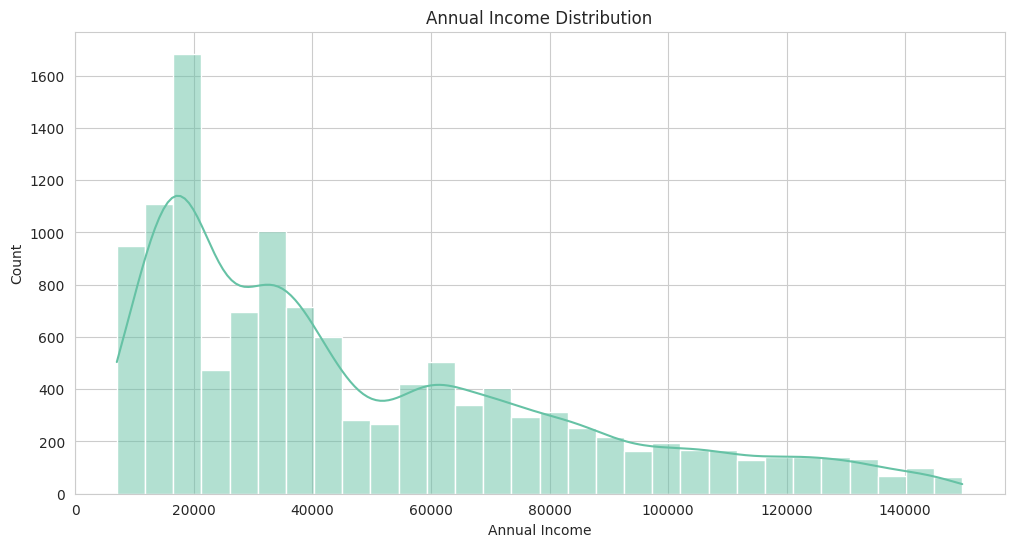

In [31]:
# Analyze income distribution
# First clean the Annual_Income field by removing underscores
def clean_numeric_field(series):
    # Convert to string, remove underscores, convert to numeric
    return pd.to_numeric(series.astype(str).str.replace('_', ''), errors='coerce')

# Clean the income field
annual_income_clean = clean_numeric_field(financials_df['Annual_Income'])

# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(annual_income_clean[annual_income_clean.between(0, 150000)], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.grid(True)
plt.show()

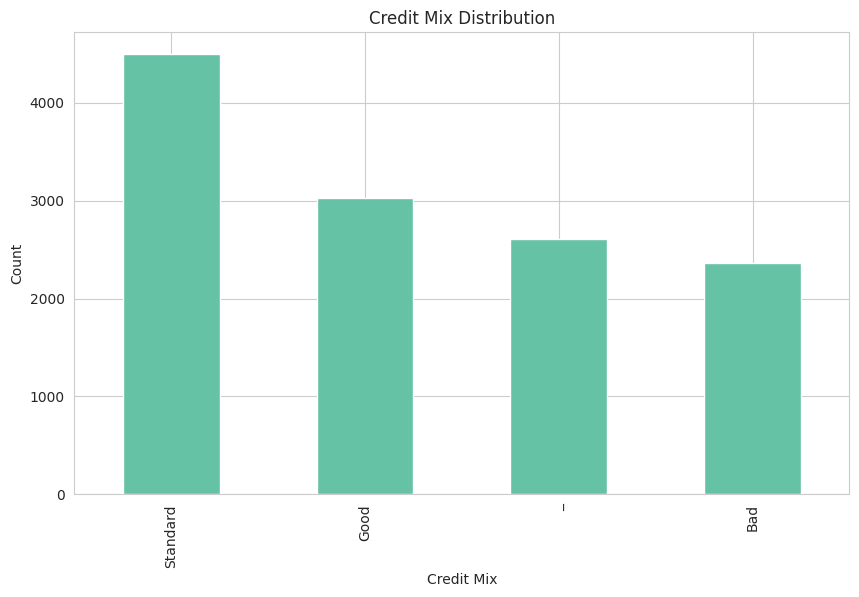

In [32]:
# Analyze Credit Mix distribution
plt.figure(figsize=(10, 6))
financials_df['Credit_Mix'].value_counts().plot(kind='bar')
plt.title('Credit Mix Distribution')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.grid(True)
plt.show()

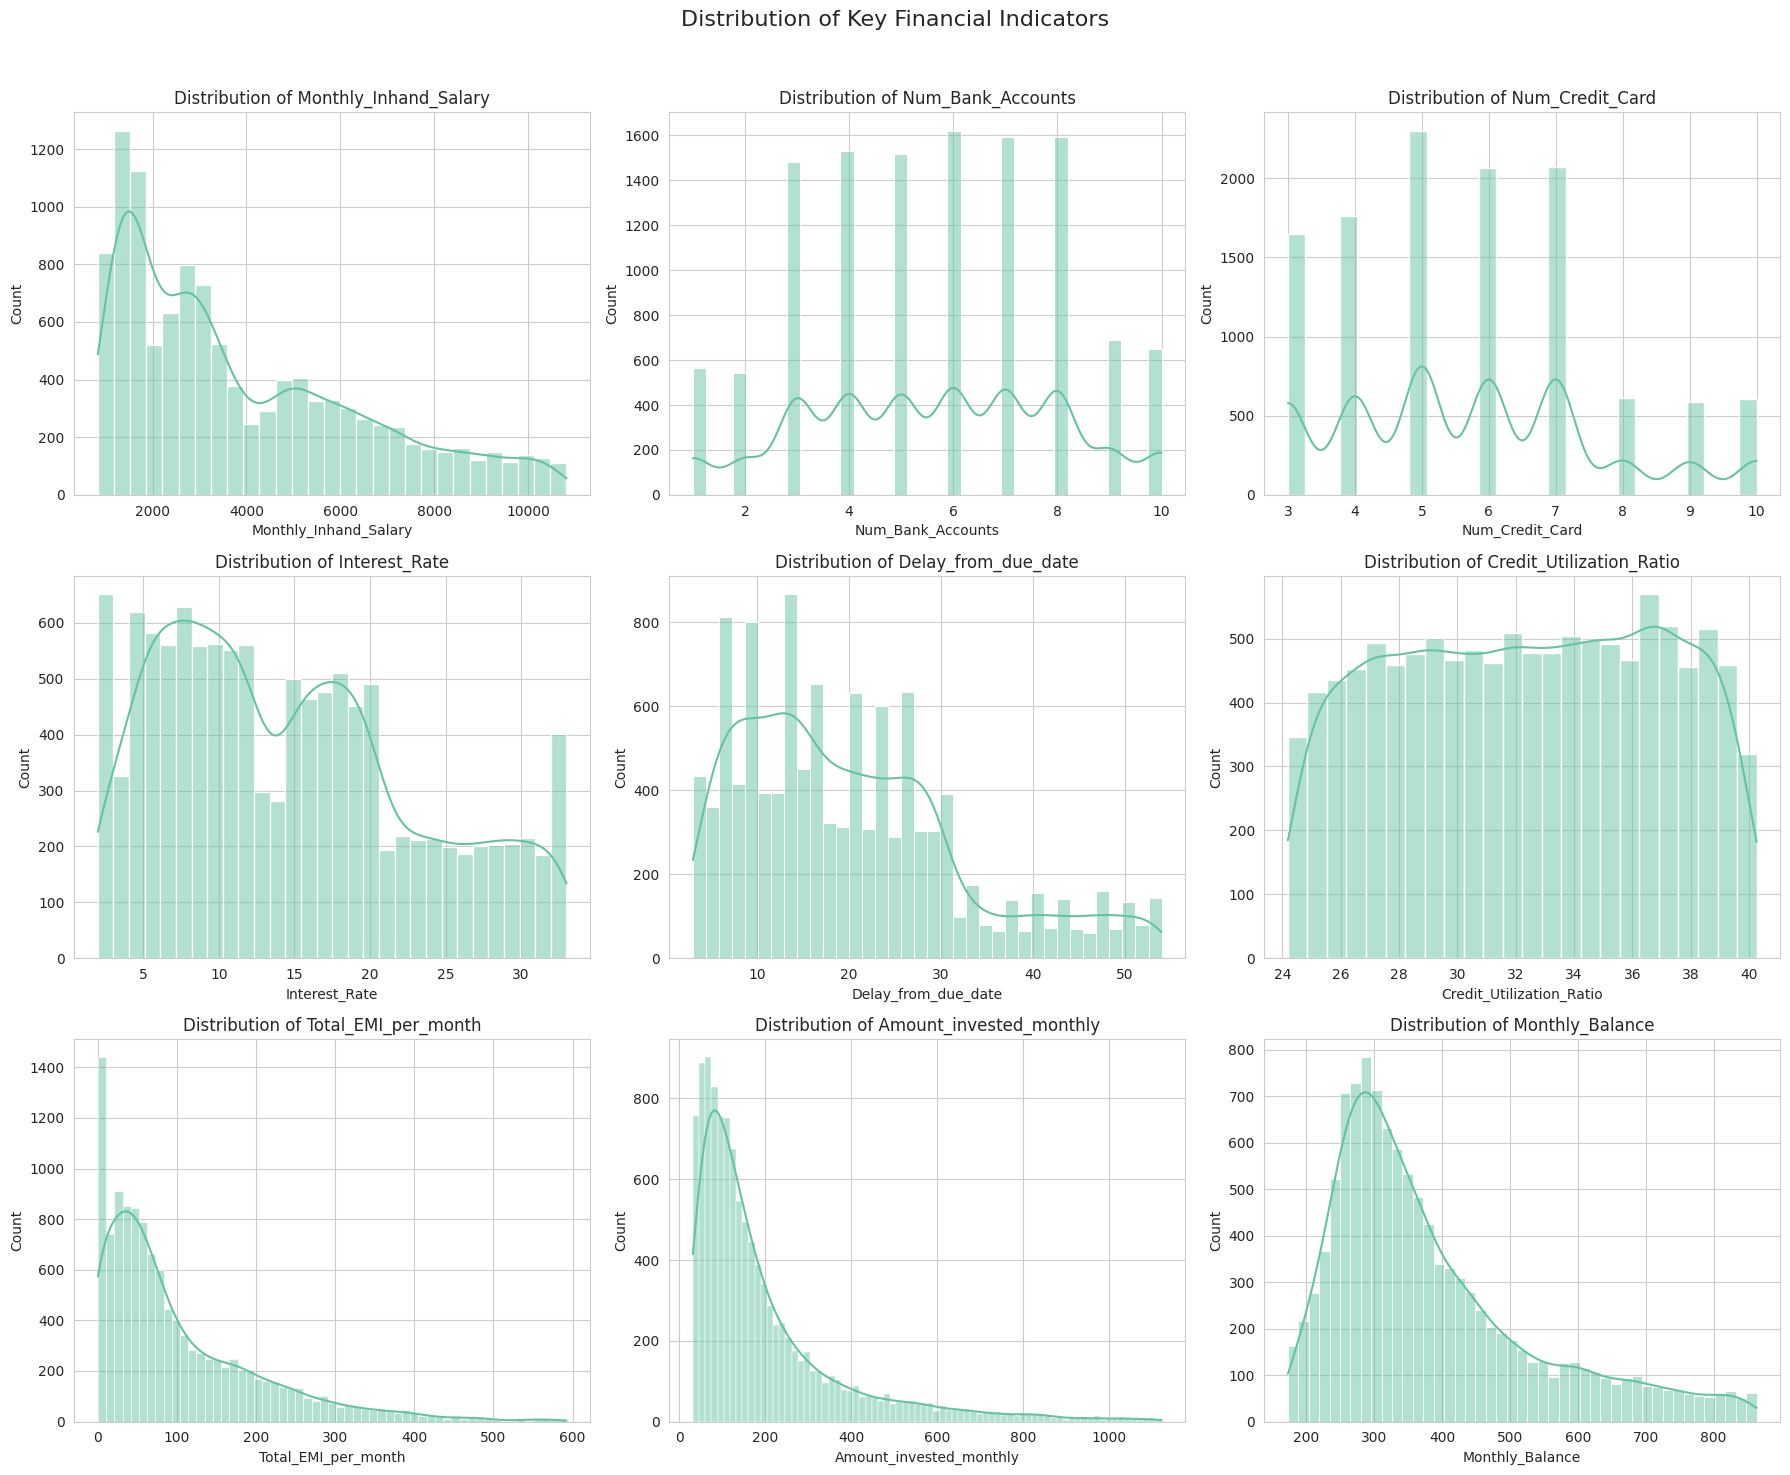

In [33]:
# Clean and analyze numeric financial indicators
# List of numeric columns to analyze
financial_indicators = [
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Delay_from_due_date',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

# Clean numeric fields that might need it
cleaned_data = {}
for col in financial_indicators:
    cleaned_data[col] = clean_numeric_field(financials_df[col])

# Add other cleaned columns
cleaned_data['Num_of_Loan'] = clean_numeric_field(financials_df['Num_of_Loan'])
cleaned_data['Num_of_Delayed_Payment'] = clean_numeric_field(financials_df['Num_of_Delayed_Payment'])
cleaned_data['Outstanding_Debt'] = clean_numeric_field(financials_df['Outstanding_Debt'])
cleaned_data['Annual_Income'] = annual_income_clean

# Plot distributions for key indicators
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribution of Key Financial Indicators', fontsize=16)

for i, col in enumerate(financial_indicators):
    row, col_idx = divmod(i, 3)
    
    # Get data with reasonable range (remove extreme outliers)
    data = cleaned_data[col]
    q1, q3 = data.quantile([0.05, 0.95])
    filtered_data = data[(data >= q1) & (data <= q3)]
    
    sns.histplot(filtered_data, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 6. Correlation Analysis

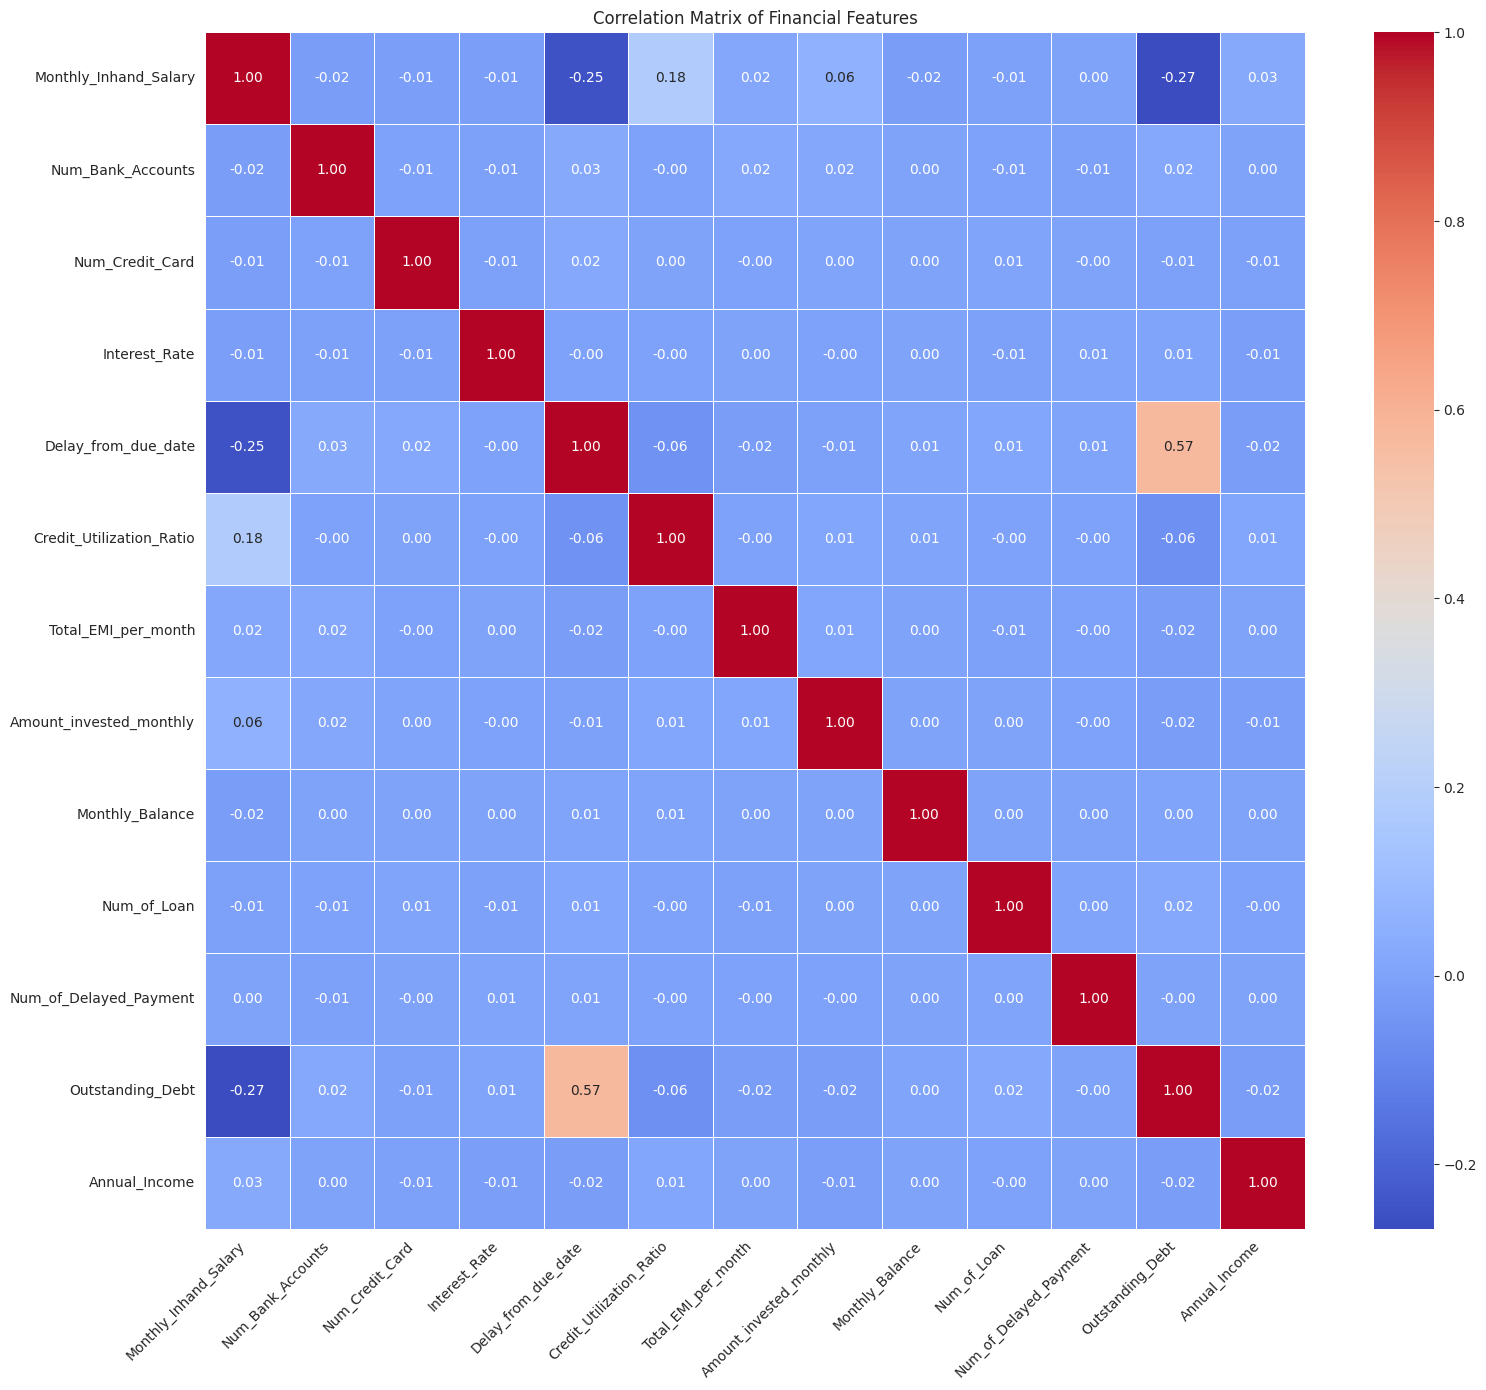

In [34]:
# Create a DataFrame with all cleaned numerical features
cleaned_financial_df = pd.DataFrame(cleaned_data)

# Calculate correlation matrix
correlation_matrix = cleaned_financial_df.corr()

# Plot correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Financial Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 7. Loan Analysis

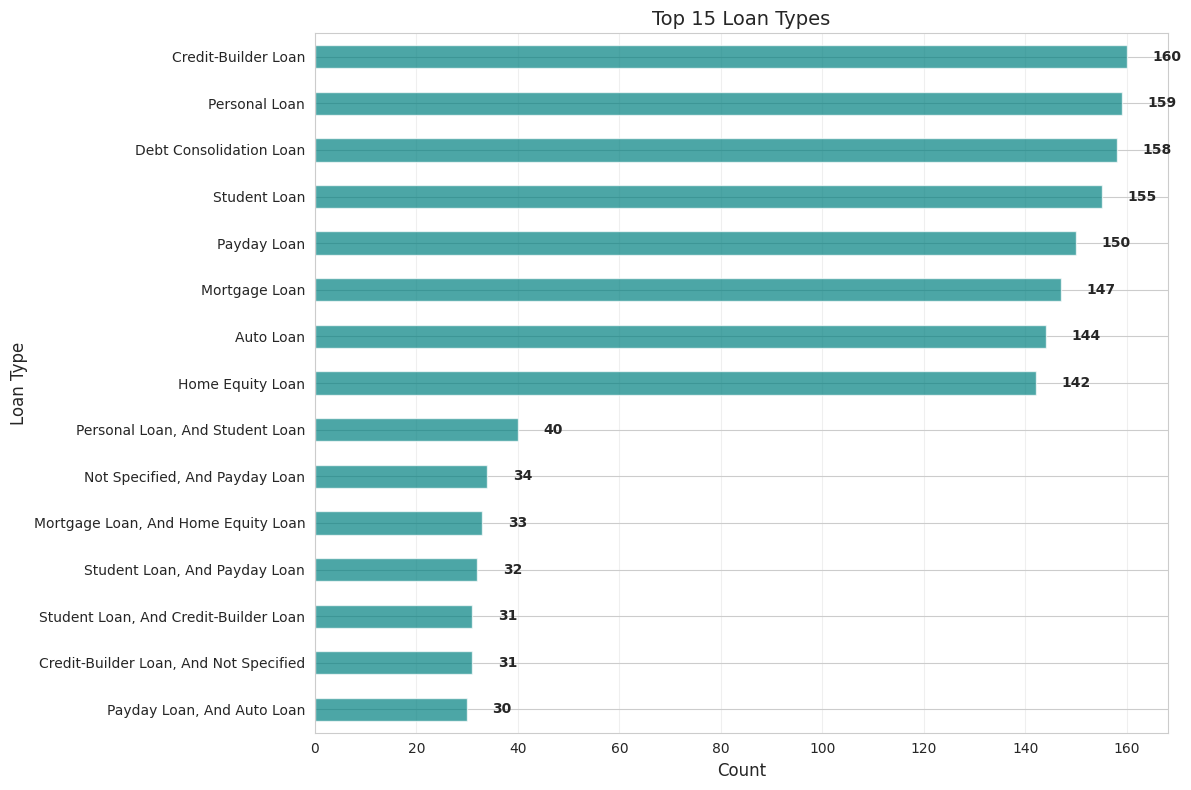

Number of 'Not Specified' loan types: 1602 (12.82%)


In [44]:
# Analyze Type_of_Loan distribution
# First handle the messiness in loan types
loan_types_raw = financials_df['Type_of_Loan'].astype(str)

# Clean and standardize loan types
def standardize_loan_type(loan_type):
    # Convert to lowercase and strip
    loan_type = str(loan_type).lower().strip()
    
    # Replace blank, nan or underscore-only values
    if loan_type in ['', 'nan', '_', 'not specified'] or loan_type.isspace():
        return 'Not Specified'
    
    # Return standardized version
    return loan_type.title()

# Apply standardization
standardized_loan_types = loan_types_raw.apply(standardize_loan_type)

# Count occurrences of standardized loan types
loan_counts = standardized_loan_types.value_counts()

# Get top 15 loan types (excluding 'Not Specified')
top_loans = loan_counts[loan_counts.index != 'Not Specified'].head(15)

# Create nicer visualization with horizontal bars
plt.figure(figsize=(12, 8))
bars = top_loans.sort_values().plot(kind='barh', color='teal', alpha=0.7)

# Add count annotations to the bars
for i, (value, count) in enumerate(top_loans.sort_values().items()):
    bars.text(count + 5, i, f"{count}", va='center', fontweight='bold')

plt.title('Top 15 Loan Types', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Loan Type', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Also show the count of 'Not Specified' separately
not_specified_count = loan_counts.get('Not Specified', 0)
print(f"Number of 'Not Specified' loan types: {not_specified_count} ({not_specified_count/len(standardized_loan_types)*100:.2f}%)")

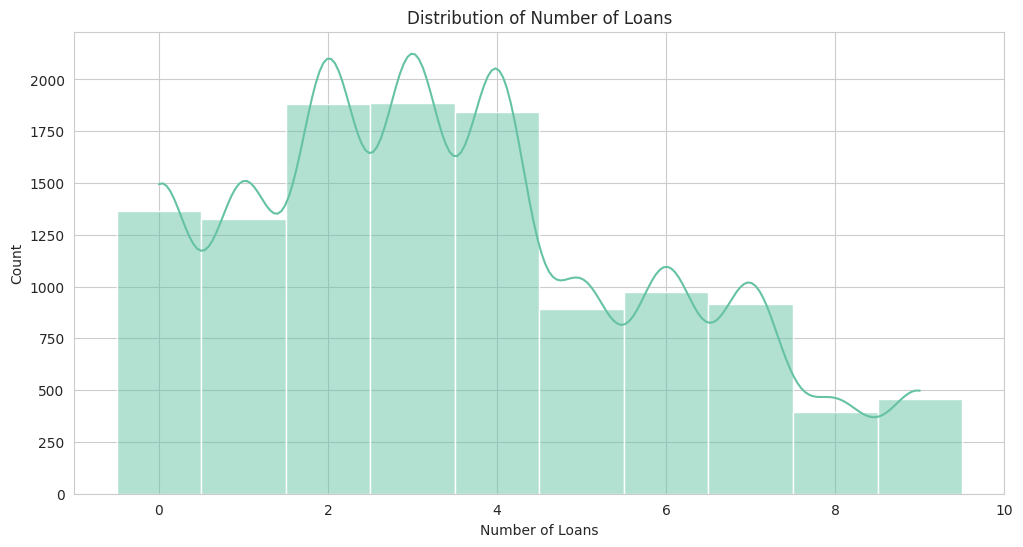

In [38]:
# Analyze Num_of_Loan distribution
num_loans_clean = cleaned_data['Num_of_Loan']

plt.figure(figsize=(12, 6))
sns.histplot(num_loans_clean[(num_loans_clean >= 0) & (num_loans_clean <= 10)], 
             bins=10, kde=True, discrete=True)
plt.title('Distribution of Number of Loans')
plt.xlabel('Number of Loans')
plt.ylabel('Count')
plt.grid(True)
plt.show()

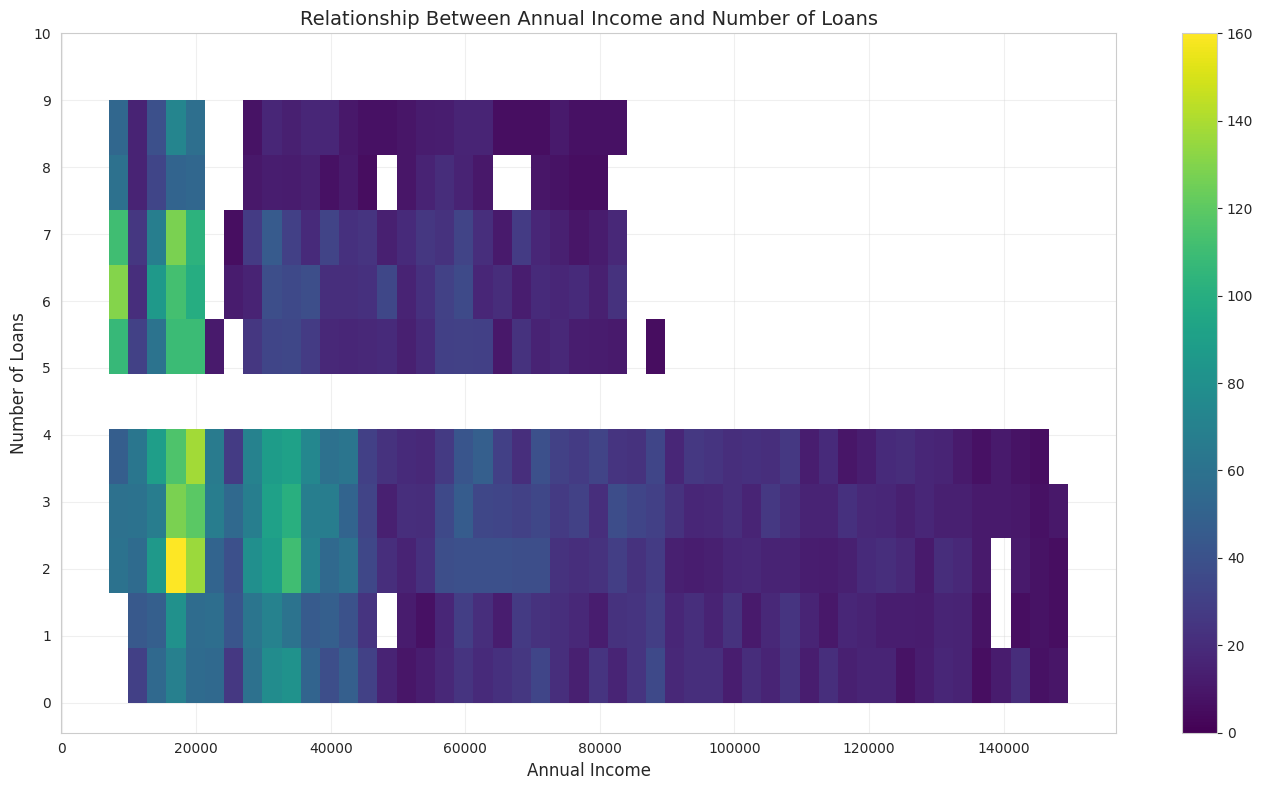

Average Number of Loans by Income Bracket:


/tmp/ipykernel_77247/3578505984.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Income_Bracket'] = pd.cut(
/tmp/ipykernel_77247/3578505984.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loans_by_income = filtered_df.groupby('Income_Bracket')['Num_of_Loan'].agg(['mean', 'median', 'count'])


,mean,median,count
Income_Bracket,,,
0-25K,4.260056,4.0,3953
25K-50K,3.282298,3.0,3220
50K-75K,3.936557,4.0,1923
75K-100K,2.888240,3.0,1199
100K-150K,2.216680,2.0,1283


In [43]:
# Analyze relationship between loans and income
plt.figure(figsize=(14, 8))

# Create a filtered dataset for visualization
loan_income_df = pd.DataFrame({
    'Annual_Income': cleaned_data['Annual_Income'],
    'Num_of_Loan': cleaned_data['Num_of_Loan']
})

# Remove outliers and negative values
filtered_df = loan_income_df[
    (loan_income_df['Annual_Income'] > 0) & 
    (loan_income_df['Annual_Income'] < 150000) &
    (loan_income_df['Num_of_Loan'] >= 0) & 
    (loan_income_df['Num_of_Loan'] <= 10)
]

# Create binned scatter plot with color intensity showing density
sns.histplot(
    data=filtered_df,
    x='Annual_Income',
    y='Num_of_Loan',
    bins=(50, 11),  # More granular bins for income, exact bins for loan count
    cbar=True,
    pthresh=0.01,  # Only show cells with enough density
    cmap='viridis'
)

plt.title('Relationship Between Annual Income and Number of Loans', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.yticks(range(0, 11))  # Integer ticks for loan count
plt.grid(True, alpha=0.3)
# plt.colorbar(label='Count')
plt.tight_layout()
plt.show()

# Calculate statistics for different income brackets
income_brackets = [0, 25000, 50000, 75000, 100000, 150000]
bracket_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K']

# Create income brackets
filtered_df['Income_Bracket'] = pd.cut(
    filtered_df['Annual_Income'], 
    bins=income_brackets, 
    labels=bracket_labels
)

# Calculate average loans by income bracket
loans_by_income = filtered_df.groupby('Income_Bracket')['Num_of_Loan'].agg(['mean', 'median', 'count'])
print("Average Number of Loans by Income Bracket:")
display(loans_by_income)

## 8. Payment Behavior Analysis

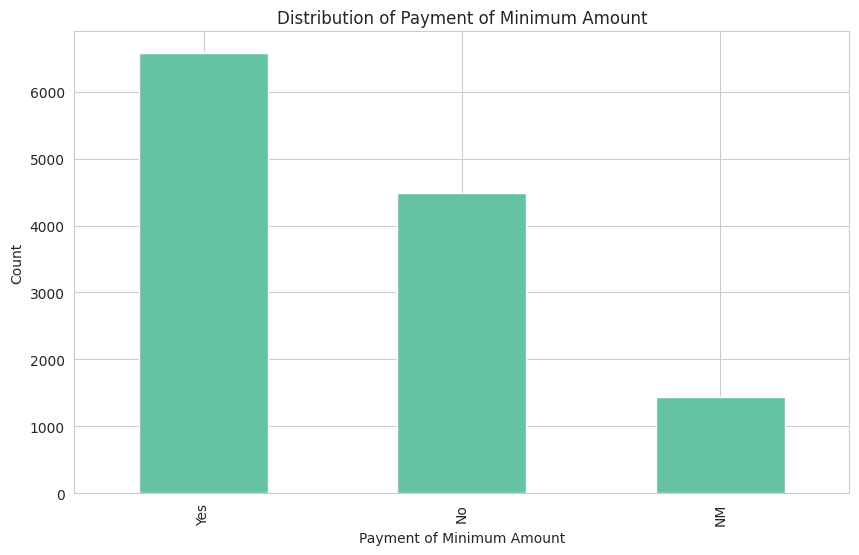

In [40]:
# Analyze Payment_of_Min_Amount distribution
payment_min_dist = financials_df['Payment_of_Min_Amount'].value_counts()

plt.figure(figsize=(10, 6))
payment_min_dist.plot(kind='bar')
plt.title('Distribution of Payment of Minimum Amount')
plt.xlabel('Payment of Minimum Amount')
plt.ylabel('Count')
plt.grid(True)
plt.show()

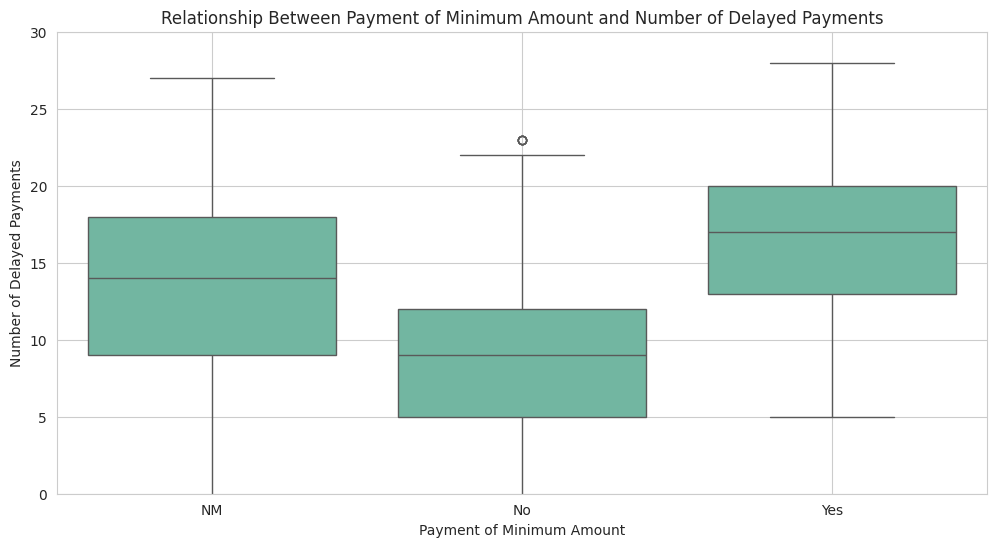

In [41]:
# Analyze relationship between payment behavior and delayed payments
plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment_of_Min_Amount', 
            y=cleaned_data['Num_of_Delayed_Payment'], 
            data=financials_df, 
            order=sorted(financials_df['Payment_of_Min_Amount'].unique()))
plt.title('Relationship Between Payment of Minimum Amount and Number of Delayed Payments')
plt.xlabel('Payment of Minimum Amount')
plt.ylabel('Number of Delayed Payments')
plt.ylim(0, 30)  # Limit y-axis to focus on main distribution
plt.grid(True)
plt.show()

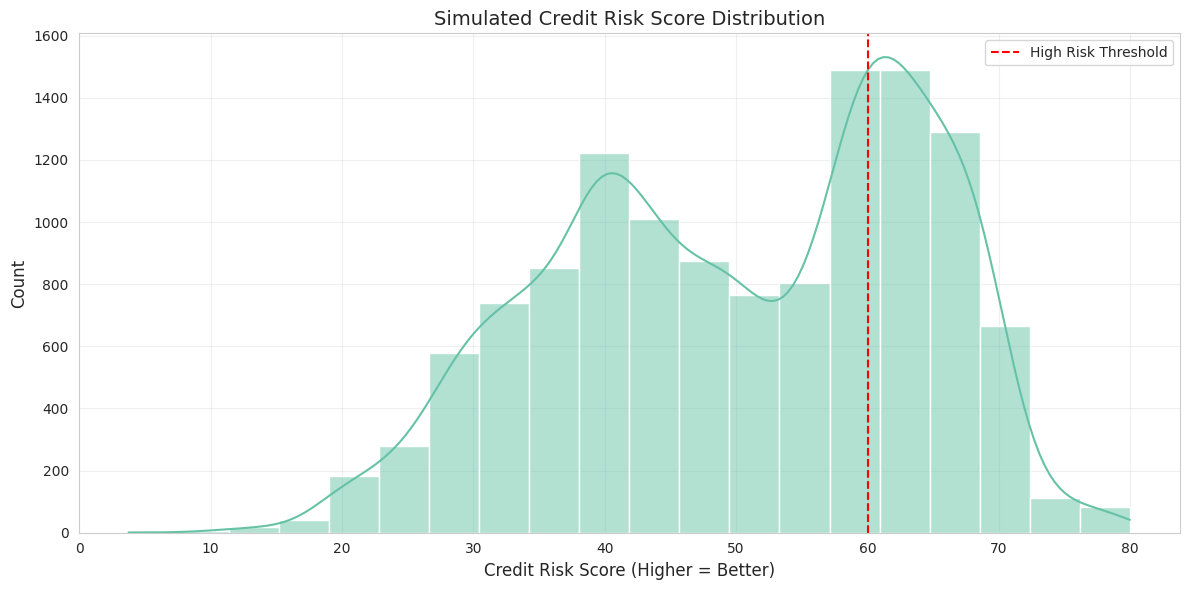

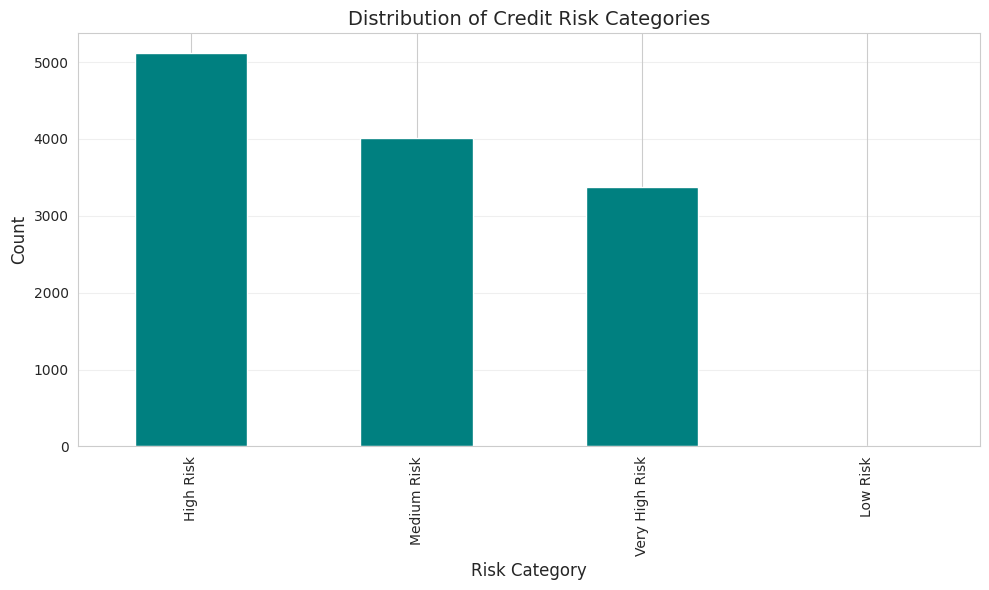

In [49]:
# Credit Risk Score Simulation

# Create a simplified credit risk score
# First, prepare the components
# 1. Credit mix score
credit_mix_score = financials_df['Credit_Mix'].map({
    'Good': 30, 
    'Standard': 20, 
    'Bad': 10, 
    '_': 0
}).fillna(0)

# 2. Payment behavior score
payment_score = financials_df['Payment_of_Min_Amount'].map({
    'Yes': 20, 
    'No': 0, 
    'NM': 10
}).fillna(0)

# 3. Calculate simplified debt-to-income ratio
cleaned_annual_income = clean_numeric_field(financials_df['Annual_Income'])
cleaned_outstanding_debt = clean_numeric_field(financials_df['Outstanding_Debt'])

# Cap debt-to-income at 100%
debt_income_ratio = (cleaned_outstanding_debt / cleaned_annual_income).clip(0, 1)
dti_score = (1 - debt_income_ratio) * 25  # Higher score for lower DTI

# 4. Credit history score based on length
credit_history_score = (credit_history_total_months / 240).clip(0, 1) * 15

# 5. Delayed payment penalty
delayed_payment_count = clean_numeric_field(financials_df['Num_of_Delayed_Payment'])
delay_penalty = (delayed_payment_count / 20).clip(0, 1) * -20

# Calculate total score (0-100 scale)
risk_score = (credit_mix_score + payment_score + dti_score + credit_history_score + delay_penalty).clip(0, 100)

# Visualize the risk score distribution
plt.figure(figsize=(12, 6))
sns.histplot(risk_score.dropna(), bins=20, kde=True)
plt.axvline(x=60, color='red', linestyle='--', label='High Risk Threshold')
plt.title('Simulated Credit Risk Score Distribution', fontsize=14)
plt.xlabel('Credit Risk Score (Higher = Better)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create risk categories
risk_categories = pd.cut(
    risk_score, 
    bins=[0, 40, 60, 80, 100], 
    labels=['Very High Risk', 'High Risk', 'Medium Risk', 'Low Risk']
)

# Show distribution of risk categories
plt.figure(figsize=(10, 6))
risk_categories.value_counts().plot(kind='bar', color='teal')
plt.title('Distribution of Credit Risk Categories', fontsize=14)
plt.xlabel('Risk Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

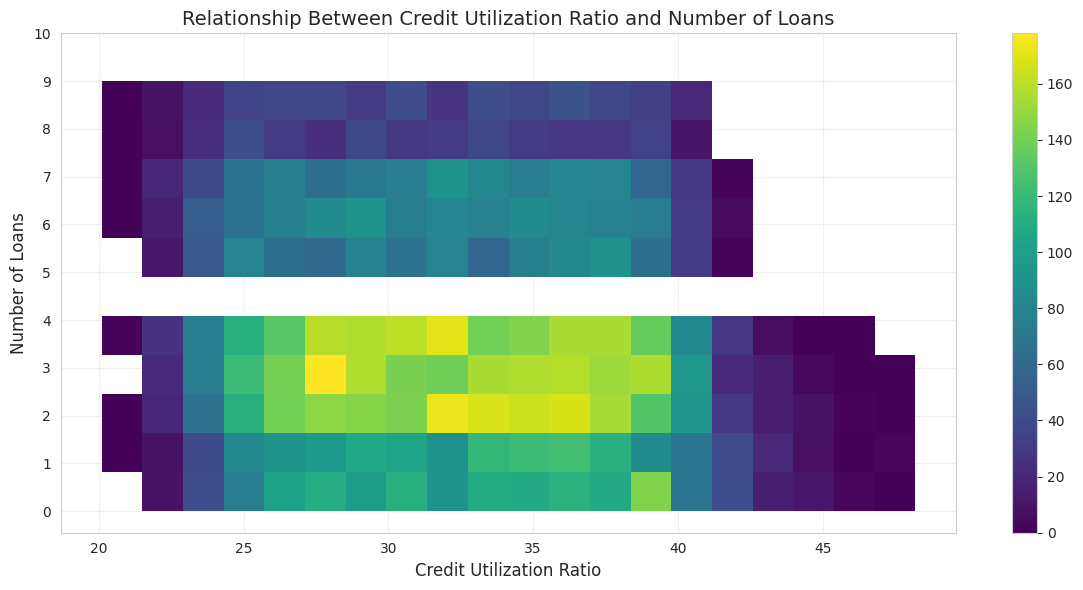

In [50]:
# Credit Utilization Analysis

# Analyze relationship between credit utilization and number of loans
plt.figure(figsize=(12, 6))

# Create filtered dataframe
filtered_data = pd.DataFrame({
    'Credit_Utilization_Ratio': cleaned_data['Credit_Utilization_Ratio'],
    'Num_of_Loan': cleaned_data['Num_of_Loan']
}).dropna()

# Apply reasonable filters
filtered_data = filtered_data[
    (filtered_data['Credit_Utilization_Ratio'] >= 0) &
    (filtered_data['Credit_Utilization_Ratio'] <= 100) &
    (filtered_data['Num_of_Loan'] >= 0) &
    (filtered_data['Num_of_Loan'] <= 10)
]

# Create binned scatter plot
sns.histplot(
    data=filtered_data,
    x='Credit_Utilization_Ratio',
    y='Num_of_Loan',
    bins=(20, 11),
    cmap='viridis',
    cbar=True
)

plt.title('Relationship Between Credit Utilization Ratio and Number of Loans', fontsize=14)
plt.xlabel('Credit Utilization Ratio', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.yticks(range(0, 11))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Summary and Recommendations for Data Pipeline

### Key Findings:
- Significant data quality issues across multiple fields: underscores in numeric fields (~5% of records), impossible negative values, and extreme outliers
- Negative correlation between income and number of loans: low-income groups (0-25K) average 4.26 loans while high-income groups (100K-150K) average only 2.22 loans
- Loan type data is highly fragmented with over 6,000 unique values, indicating inconsistent data entry
- Strong correlation (0.57) between delay from due date and outstanding debt, a potential predictor for default risk
- Customers who only pay minimum amounts show higher numbers of delayed payments
- Credit utilization ratio shows distinct patterns with loan count - customers with 2-4 loans have higher utilization (30-35%)
- Simulated credit risk score shows bimodal distribution with peaks at scores 40 and 60
- Risk category distribution reveals most customers fall in either High or Medium risk categories, with very few Low risk customers
- Credit Mix and Payment Behavior categories contain meaningful patterns for risk assessment

### Recommendations for Bronze Layer:
- Load raw data without modifications to preserve original values and patterns
- Add data quality flags for potentially problematic records at ingestion
- Implement comprehensive data lineage tracking (source, timestamp, versions)
- Create data quality metrics to track issues by data source

### Recommendations for Silver Layer:
- Clean numeric fields by removing underscores and validating data types
- Handle illogical negative values in positive-only fields (e.g., Num_Bank_Accounts)
- Standardize loan type categories to reduce extreme fragmentation
- Replace placeholder values with standardized missing value markers
- Parse and standardize Credit_History_Age into numeric months (currently in "X Years and Y Months" format)
- Implement data range validation and outlier detection
- Normalize format of categorical fields like Payment_of_Min_Amount

### Recommendations for Gold Layer:
- Create financial ratios (debt-to-income, EMI-to-salary) as risk indicators
- Build credit risk scoring model combining multiple factors (as demonstrated in simulation)
- Generate segmentation features based on risk categories
- Create categorical features from loan types and combinations
- Build credit behavior features from Payment_of_Min_Amount and Credit_Mix
- Design specialized features for different income brackets to capture varying borrowing patterns
- Create features that capture the relationship between credit utilization and number of loans
- Implement feature flags to indicate presence of key financial indicators
- Develop a composite data quality score as a confidence metric for predictions